In [1]:
from pandas import Series,DataFrame
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import statistics
import scipy.stats as stats
import math

In [2]:
import tensorflow

In [9]:
import keras 
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
df=pd.read_csv("winequality_red.csv")

In [3]:
df.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


<Figure size 2160x2160 with 0 Axes>

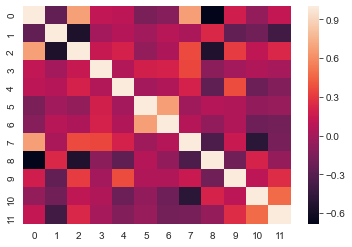

<Figure size 2160x2160 with 0 Axes>

In [4]:
sns.heatmap(np.corrcoef(df.T))
plt.figure(figsize=(30,30))

In [20]:
x=df["pH"]
y=df["alcohol"]
a=np.mean(y)
b=(y-a)/x

In [6]:
def trans(c):
    m=np.mean(c)
    sd=np.sqrt(np.var(c))
    return([m,sd])

In [7]:
b

0      -0.291448
1      -0.194682
2      -0.191099
3      -0.197147
4      -0.291448
          ...   
1594    0.022324
1595    0.220743
1596    0.168718
1597   -0.062460
1598    0.170211
Length: 1599, dtype: float64

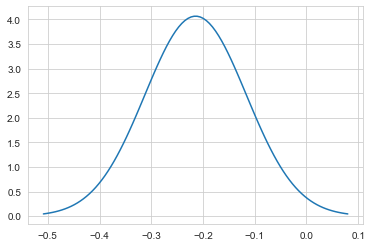

In [8]:
a1=trans(b[0:10])
m1=a1[0]
sd1=(a1[1])
x = np.linspace(m1 - 3*sd1, m1 + 3*sd1, 100)
plt.plot(x, stats.norm.pdf(x, m1, sd1))

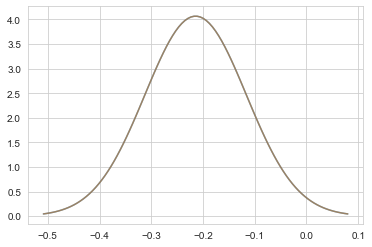

In [9]:
a1=trans(b[10:50])
m2=a1[0]
sd2=a1[1]
x = np.linspace(m1 - 3*sd1, m1 + 3*sd1, 100)
plt.plot(x, stats.norm.pdf(x, m1, sd1),alpha=.9)
#plt.figure(figsize=(20,5))
x1 = np.linspace(m2 - 3*sd2, m2 + 3*sd2, 100)
plt.plot(x, stats.norm.pdf(x, m1, sd1),alpha=.5)
#plt.figure(figsize=(20,5))

In [10]:
[m1,m2,sd1,sd2]

[-0.21437483392298134,
 -0.206856388242668,
 0.09808146729727565,
 0.2076211391315675]

In [11]:
def loss(y,x,b):
    n=len(y)
    y_pre=(x*b)+np.mean(y)
    d=(y-y_pre)
    l=sum(d*d)/n
    return(l)

In [22]:
v=b_est(x[0:2],y[0:2])
v

-1.2903225806451641

In [16]:
def b_est(x,y):
    r=np.corrcoef(x,y)[0][1]
    sy=np.sqrt(np.var(y))
    sx=np.sqrt(np.var(x))
    syx=(r*sy)/sx
    return(syx)

In [29]:
def pred(x1,y1,mo,vo):
    m1=mo
    b=mo
    sd1=vo
    mn=[]
    sd2=sd1
    m2=b_est(x1[0:51],y1[0:51])
    for j in np.arange(51,len(y1)-10):
        m3=((m1*m2)+(b*sd1))/(m1+sd1)
        #m3=((m1*sd1*sd1)+(x*sd1*sd1))/((sd1*sd1)+(sd2*sd2))
        #sd3=(m1*sd1)/(m1+sd1)
        b=b_est(x1[50:j+1],y1[50:j+1])
        mn=np.append(mn,m3)
        sd2=np.sqrt(np.var(b))
        m2=m3
    return(mn)

In [30]:
x=df["pH"]
y=df["alcohol"]
xb=b_est(x,y)

In [32]:
xb

1.4193983794784555

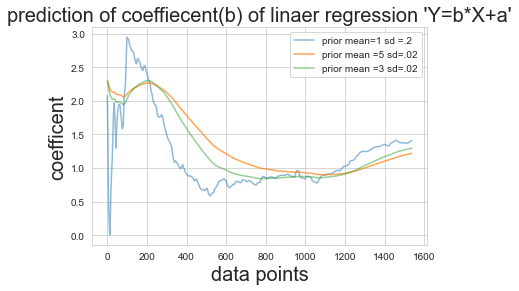

In [33]:
plt.plot(pred(x,y,1,.2),alpha=.5)
plt.plot(pred(x,y,5,.02),alpha=.7)
plt.plot(pred(x,y,3,.02),alpha=.5)
plt.title("prediction of coeffiecent(b) of linaer regression 'Y=b*X+a'",fontsize=20)
plt.xlabel("data points",fontsize=20)
plt.ylabel("coefficent",fontsize=20)
plt.legend(["prior mean=1 sd =.2","prior mean =5 sd=.02","prior mean =3 sd=.02"])

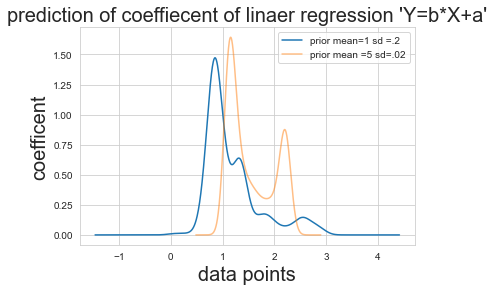

In [35]:
DataFrame((pred(x,y,1,.2)))[0].plot(kind="kde")%%shataFrame((pred(x,y,5,.01)))[0].plot(kind="kde",alpha=.5)
plt.title("prediction of coeffiecent of linaer regression 'Y=b*X+a'",fontsize=20)
plt.xlabel("data points",fontsize=20)
plt.ylabel("coefficent",fontsize=20)
plt.legend(["prior mean=1 sd =.2","prior mean =5 sd=.02"])

In [45]:
from sklearn.linear_model import LinearRegression

In [86]:
model=LinearRegression()
model.fit(df["pH"].values.reshape(-1,1),df["alcohol"].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [87]:
model.coef_

array([[1.41939838]])

In [88]:
model.intercept_

array([5.72319441])

In [57]:
model.predict(df["pH"].values.reshape(-1,1))

array([[10.70528272],
       [10.26526922],
       [10.35043313],
       ...,
       [10.57753687],
       [10.79044662],
       [10.53495492]])

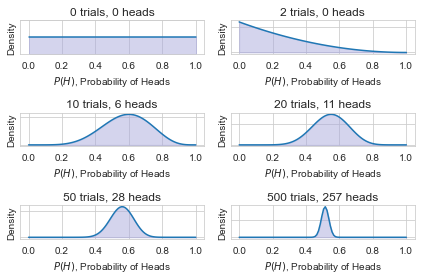

In [7]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt


if __name__ == "__main__":
    # Create a list of the number of coin tosses ("Bernoulli trials")
    number_of_trials = [0, 2, 10, 20, 50, 500]

    # Conduct 500 coin tosses and output into a list of 0s and 1s
    # where 0 represents a tail and 1 represents a head
    data = stats.bernoulli.rvs(0.5, size=number_of_trials[-1])
    
    # Discretise the x-axis into 100 separate plotting points
    x = np.linspace(0, 1, 100)
    
    # Loops over the number_of_trials list to continually add
    # more coin toss data. For each new set of data, we update
    # our (current) prior belief to be a new posterior. This is
    # carried out using what is known as the Beta-Binomial model.
    # For the time being, we won't worry about this too much. It 
    # will be the subject of a later article!
    for i, N in enumerate(number_of_trials):
        # Accumulate the total number of heads for this 
        # particular Bayesian update
        heads = data[:N].sum()

        # Create an axes subplot for each update 
        ax = plt.subplot(len(number_of_trials) / 2, 2, i + 1)
        ax.set_title("%s trials, %s heads" % (N, heads))

        # Add labels to both axes and hide labels on y-axis
        plt.xlabel("$P(H)$, Probability of Heads")
        plt.ylabel("Density")
        if i == 0:
            plt.ylim([0.0, 2.0])
        plt.setp(ax.get_yticklabels(), visible=False)
                
        # Create and plot a  Beta distribution to represent the 
        # posterior belief in fairness of the coin.
        y = stats.beta.pdf(x, 1 + heads, 1 + N - heads)
        plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
        plt.fill_between(x, 0, y, color="#aaaadd", alpha=0.5)

    # Expand plot to cover full width/height and show it
    plt.tight_layout()
    plt.show()

In [ ]:
#time_series_approach

In [40]:
df=pd.read_csv("GOOG.csv")

In [41]:
df[50:51]

,Date,Open,High,Low,Close,Adj Close,Volume
50,2005-08-01,143.522049,149.300385,143.512085,145.62915,145.62915,60343500


In [42]:
dft=df["Close"]
t=dft.values

Text(0.5, 0, 'stock_price')

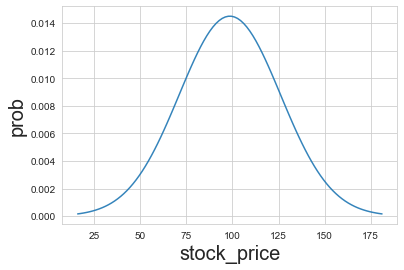

In [43]:
m1=np.mean(t[0:50])
sd1=np.sqrt(np.var(t[0:50]))
x = np.linspace(m1 - 3*sd1, m1 + 3*sd1, 100)
plt.plot(x, stats.norm.pdf(x, m1, sd1),alpha=.9)
plt.ylabel("prob",fontsize=20)
plt.xlabel("stock_price",fontsize=20)

In [44]:
[m1,sd1]

[98.58537745999998, 27.500918613157786]

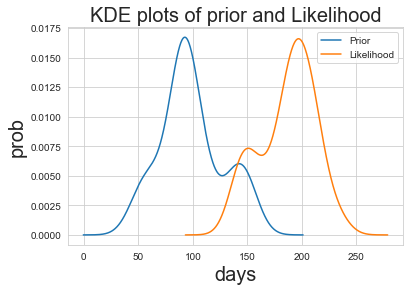

In [45]:
dft[0:50].plot(kind="kde")
dft[50:100].plot(kind="kde")
plt.title("KDE plots of prior and Likelihood",fontsize=20)
plt.xlabel("days",fontsize=20)
plt.ylabel("prob",fontsize=20)
plt.legend(["Prior","Likelihood"])

Text(0.5, 1.0, 'from of Likelihood')

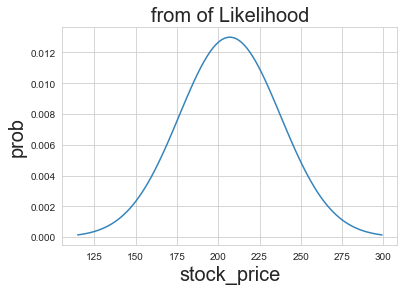

In [46]:
m2=np.mean(t[50:150])
sd2=np.sqrt(np.var(t[50:150]))
x = np.linspace(m2 - 3*sd2, m2 + 3*sd2, 100)
plt.plot(x, stats.norm.pdf(x, m2, sd2),alpha=.9)
plt.ylabel("prob",fontsize=20)
plt.xlabel("stock_price",fontsize=20)
plt.title("from of Likelihood",fontsize=20)

In [47]:

[m2,sd2]

[207.00564196, 30.712484207928505]

In [48]:
[m3,sd3]

NameError: name 'm3' is not defined

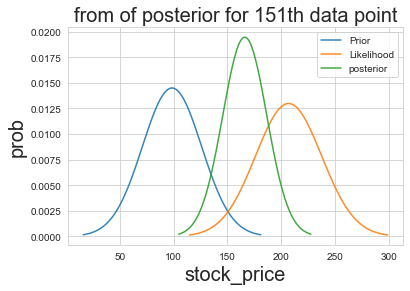

In [49]:
m1=np.mean(t[0:50])
sd1=np.sqrt(np.var(t[0:50]))
x = np.linspace(m1 - 3*sd1, m1 + 3*sd1, 100)
plt.plot(x, stats.norm.pdf(x, m1, sd1),alpha=.9)
m2=np.mean(t[50:150])
sd2=np.sqrt(np.var(t[50:150]))
x = np.linspace(m2 - 3*sd2, m2 + 3*sd2, 100)
plt.plot(x, stats.norm.pdf(x, m2, sd2),alpha=.9)
m3=((m1*sd1*sd1)+(t[151]*sd1*sd1))/((sd1*sd1)+(sd2*sd2))
sd3=np.sqrt(sd1*sd1*sd2*sd2/((sd1*sd1)+(sd2*sd2)))
x = np.linspace(m3 - 3*sd3, m3 + 3*sd3, 100)
plt.plot(x, stats.norm.pdf(x, m3, sd3),alpha=.9)
plt.ylabel("prob",fontsize=20)
plt.xlabel("stock_price",fontsize=20)
plt.title("from of posterior for 151th data point",fontsize=20)
plt.legend(["Prior","Likelihood","posterior"])

In [50]:
mn=[]
t=df["Close"]
for i in np.arange(0,len(t)-151,1):
    pr=t[i:i+50]
    lk=t[i+50:i+150]
    m1=np.mean(pr)
    sd1=np.sqrt(np.var(pr))
    m2=np.mean(lk)
    sd2=np.sqrt(np.mean(lk))
    x=t[i+151]
    #m3=((m1*m2)+(x*sd1))/(m1+sd1)
    #sd3=(m1*sd1)/(m1+sd1)
    m3=((m1*sd1*sd1)+(x*sd1*sd1))/((sd1*sd1)+(sd2*sd2))
    mn=np.append(mn,m3)

In [51]:
def bts(t,trm):       #t>150
    p=[]
    for i in np.arange(0,len(t)-151,1):
        pr=t[i:i+50]
        lk=t[i+50:i+150]
        m1=np.mean(pr)
        sd1=np.sqrt(np.var(pr))
        m2=np.mean(lk)
        sd2=np.sqrt(np.mean(lk))
        x=t[i+151]
        #m3=((m1*m2)+(x*sd1))/(m1+sd1)
        #sd3=(m1*sd1)/(m1+sd1)
        m3=((m1*sd1*sd1)+(x*sd1*sd1))/((sd1*sd1)+(sd2*sd2))
        p=np.append(p,m3)
    return(p[trm])

In [89]:
bts(t,len(t)-152)

1048.2284303295398

In [52]:
mn=[]
t=df["Close"]
for i in np.arange(0,len(t)-151,1):
    pr=t[i:i+50]
    lk=t[i+50:i+150]
    m1=np.mean(pr)#i
    sd1=np.sqrt(np.var(pr))#((len(t)-i)/len(t))*100
    m2=np.mean(lk)
    sd2=np.sqrt(np.mean(lk))
    x=t[i+151]
    #m3=((m1*m2)+(x*sd1))/(m1+sd1)
    #sd3=(m1*sd1)/(m1+sd1)
    m3=((m1*sd1*sd1)+(x*sd1*sd1))/((sd1*sd1)+(sd2*sd2))
    mn=np.append(mn,m3)

coefficent of determination is given as  0.714402218057965


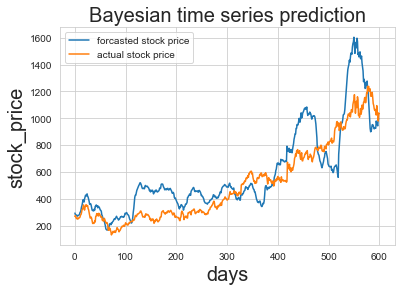

In [55]:
plt.plot(mn)
plt.plot(df["Close"][150:].values)
plt.title("Bayesian time series prediction",fontsize=20)
plt.xlabel("days",fontsize=20)
plt.ylabel("stock_price",fontsize=20)
plt.legend(["forcasted stock price","actual stock price"])
print("coefficent of determination is given as ",r2_score(mn,t[151:]))

In [64]:
mn=[]
t=df["Close"]
for i in np.arange(0,len(t)-151,1):
    pr=t[i:i+50]
    lk=t[i+50:i+150]
    m1=np.mean(pr)-i
    sd1=np.sqrt(np.var(pr))*((len(t)-i)/len(t))*100
    m2=np.mean(lk)
    sd2=np.sqrt(np.mean(lk))
    x=t[i+151]
    #m3=((m1*m2)+(x*sd1))/(m1+sd1)
    #sd3=(m1*sd1)/(m1+sd1)
    m3=((m1*sd1*sd1)+(x*sd1*sd1))/((sd1*sd1)+(sd2*sd2))
    mn=np.append(mn,m3)

coefficent of determination is given as  0.9167016639391848


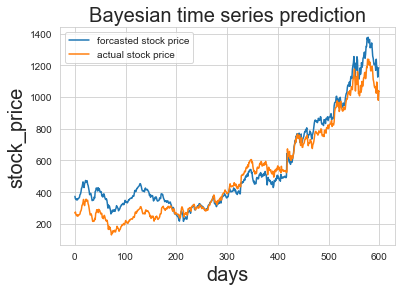

In [65]:
plt.plot(mn)
plt.plot(df["Close"][150:].values)
plt.title("Bayesian time series prediction",fontsize=20)
plt.xlabel("days",fontsize=20)
plt.ylabel("stock_price",fontsize=20)
plt.legend(["forcasted stock price","actual stock price"])
print("coefficent of determination is given as ",r2_score(mn,t[151:]))

In [119]:
p=(mn-t[151:])

In [129]:
p=(p)

In [130]:
q=(mn-t[151:])

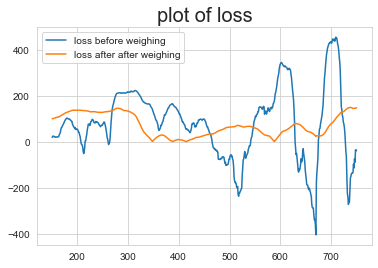

In [131]:
plt.plot(q)
plt.plot(p)
plt.title("plot of loss",fontsize=20)
plt.legend(["loss before weighing","loss after after weighing"])

In [54]:
import sklearn
from sklearn.metrics import r2_score,accuracy_score

In [55]:
r2_score(mn,t[151:])

0.17578210241661874

In [ ]:
#ARIMA

In [66]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.graphics.tsaplots  as sm
from statsmodels.tsa.arima_model import ARIMA

In [67]:
t[0:10]

0    53.952770
1    52.876804
2    49.818268
3    52.468334
4    58.525631
5    59.691261
6    66.042458
7    68.607841
8    71.785927
9    85.893051
Name: Close, dtype: float64

In [68]:
tr=dft.rolling(window=12).mean()

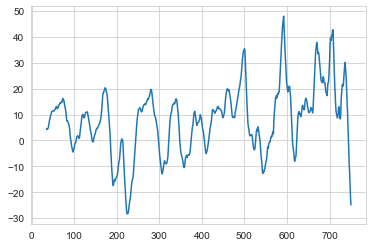

In [69]:
tn=(t[12:]-tr[12:])
plt.plot(tn.rolling(window=24).mean())

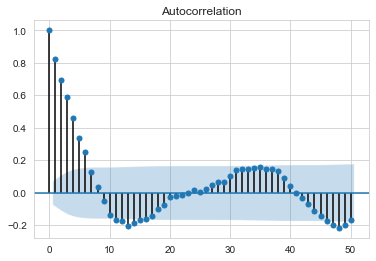

In [70]:
fig=sm.plot_acf(tn,lags=50)                       #for_selection_of_p

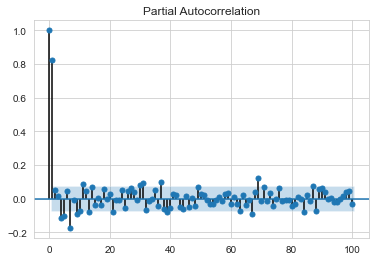

In [64]:
fig=sm.plot_pacf(tn,lags=100)      #q

In [71]:
p=6
q=3
d=1

In [72]:
model_ar=ARIMA(tn,order=(p,d,q))
ar=model_ar.fit()

In [73]:
y_pre=(ar.predict(start=13,end=750))

In [75]:
y_pre1=y_pre.values+tr[13:].values

In [126]:
np.append(np.ones(50),mn)[1:20]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

coefficent of determination is given as  0.9891590643501131


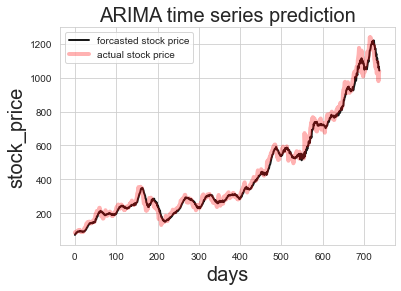

In [119]:
plt.plot(y_pre1,alpha=.9,color="black",linewidth=2)
plt.plot(t[13:].values,alpha=.3,color="red",linewidth=4)
#plt.plot(np.append(np.zeros(139),mn))
plt.title("ARIMA time series prediction",fontsize=20)
plt.xlabel("days",fontsize=20)
plt.ylabel("stock_price",fontsize=20)
plt.legend(["forcasted stock price","actual stock price","Bayesian Forcasting"])
print("coefficent of determination is given as ",r2_score(y_pre1,t[13:]))

coefficent of determination is given as  0.9891590643501131


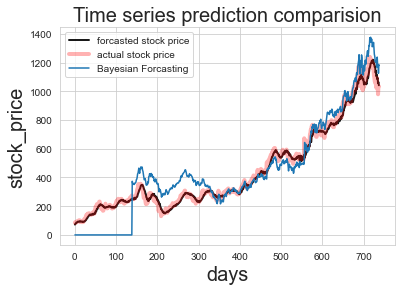

In [125]:
plt.plot(y_pre1,alpha=.9,color="black",linewidth=2)
plt.plot(t[13:].values,alpha=.3,color="red",linewidth=4)
plt.plot(np.append(np.zeros(139),mn))
plt.title("Time series prediction comparision",fontsize=20)
plt.xlabel("days",fontsize=20)
plt.ylabel("stock_price",fontsize=20)
plt.legend(["forcasted stock price","actual stock price","Bayesian Forcasting"])
print("coefficent of determination is given as ",r2_score(y_pre1,t[13:]))

In [91]:
(tr[13:])#==len(y_pre)

13       72.266627
14       75.561776
15       78.678012
16       80.926252
17       83.427294
          ...     
746    1094.603322
747    1084.270823
748    1066.443324
749    1056.420822
750    1050.214991
Name: Close, Length: 738, dtype: float64

In [172]:
(y_pre1)

array([  71.79990882,   77.27991558,   81.06143069,   81.14923778,
         85.76424097,   88.44439491,   88.2077526 ,   93.1884949 ,
         92.15984366,   92.68876139,   92.52792281,   94.19828694,
         91.02907999,   95.09157963,   94.72099084,   92.41642536,
         92.66555624,   91.15979131,   92.96509749,   91.49117559,
         91.10766037,   90.37342364,   93.50548448,   93.59998361,
         95.45144838,   99.16003137,  100.78431785,  104.68972379,
        109.36362822,  114.67212689,  116.99665468,  122.94533603,
        126.03365524,  131.1013647 ,  133.60433092,  137.73904844,
        141.63212282,  139.81932934,  140.28056411,  141.62177961,
        143.79216313,  141.11941645,  142.17418988,  140.39440707,
        148.03296024,  142.28612464,  145.86122157,  148.00066384,
        147.14832816,  148.58071442,  163.96153352,  162.16409328,
        167.28124665,  180.94262512,  180.33354613,  182.56379736,
        196.24554502,  194.97403902,  204.71563547,  204.22054

In [7]:
y=pd.get_dummies(df["quality"]).values

In [8]:
x=df.drop("quality",axis=1).values

In [22]:
model = Sequential()

In [23]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))  

In [24]:
model.add(Dense(units= 6, kernel_initializer = 'uniform', activation = 'relu'))   

In [25]:
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))  

In [26]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [32]:
model.fit(x, y, batch_size = 10, epochs = 15)

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
1599/1599 [==============================] - 3s 2ms/step - loss: 0.4872 - acc: 0.8339
Epoch 2/15
1599/1599 [==============================] - 0s 226us/step - loss: 0.4271 - acc: 0.8408
Epoch 3/15
1599/1599 [==============================] - 0s 181us/step - loss: 0.4217 - acc: 0.8449
Epoch 4/15
1599/1599 [==============================] - 0s 158us/step - loss: 0.4199 - acc: 0.8440
Epoch 5/15
1599/1599 [==============================] - 0s 161us/step - loss: 0.4206 - acc: 0.8447
Epoch 6/15
1599/1599 [==============================] - 0s 195us/step - loss: 0.4240 - acc: 0.8440
Epoch 7/15
1599/1599 [==============================] - 0s 177us/step - loss: 0.4454 - acc: 0.8370
Epoch 8/15
1599/1599 [==============================] - 0s 169us/step - loss: 0.4242 - acc: 0.8325
Epoch 9/15
1599/1599 [==============================] - 0s 153us/step - loss: 0.4190 - acc: 0.8417
Epoch 10/15
1599/1599 [==============================] - 0s 161

In [40]:
(model.get_weights)

<bound method Network.get_weights of <keras.engine.sequential.Sequential object at 0x000001BCBB7226A0>>

In [ ]:
#MCMC

In [16]:
X1=x.T[0]
X2=x.T[1]
Y=(df["quality"]).values

In [1]:
import pymc3 as pm
#https://docs.pymc.io/notebooks/getting_started.html

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [17]:
basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal('sigma', sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=Y)

In [18]:
map_estimate = pm.find_MAP(model=basic_model)

map_estimate

{'alpha': array(6.44978309),
 'beta': array([ 0.01200414, -1.73099432]),
 'sigma_log__': array(-0.29733014),
 'sigma': array(0.74279874)}

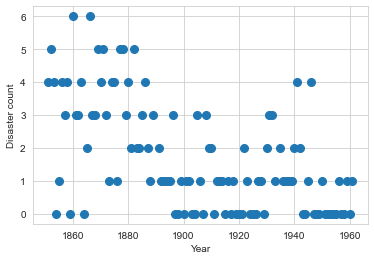

In [19]:
import pandas as pd
disaster_data = pd.Series([4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
                           3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
                           2, 2, 3, 4, 2, 1, 3, np.nan, 2, 1, 1, 1, 1, 3, 0, 0,
                           1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
                           0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
                           3, 3, 1, np.nan, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
                           0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])
years = np.arange(1851, 1962)

plt.plot(years, disaster_data, 'o', markersize=8);
plt.ylabel("Disaster count")
plt.xlabel("Year");

In [20]:
with pm.Model() as disaster_model:

    switchpoint = pm.DiscreteUniform('switchpoint', lower=years.min(), upper=years.max(), testval=1900)

    # Priors for pre- and post-switch rates number of disasters
    early_rate = pm.Exponential('early_rate', 1)
    late_rate = pm.Exponential('late_rate', 1)
    # Allocate appropriate Poisson rates to years before and after current
    rate = pm.math.switch(switchpoint >= years, early_rate, late_rate)

    disasters = pm.Poisson('disasters', rate, observed=disaster_data)

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\pymc3\model.py:1668: ImputationWarning: Data in disasters contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


In [22]:
with disaster_model:
    trace = pm.sample(10000)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>CompoundStep
>>Metropolis: [disasters_missing]
>>Metropolis: [switchpoint]
>NUTS: [late_rate, early_rate]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 352 seconds.
The number of effective samples is smaller than 10% for some parameters.


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\arviz\data\io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


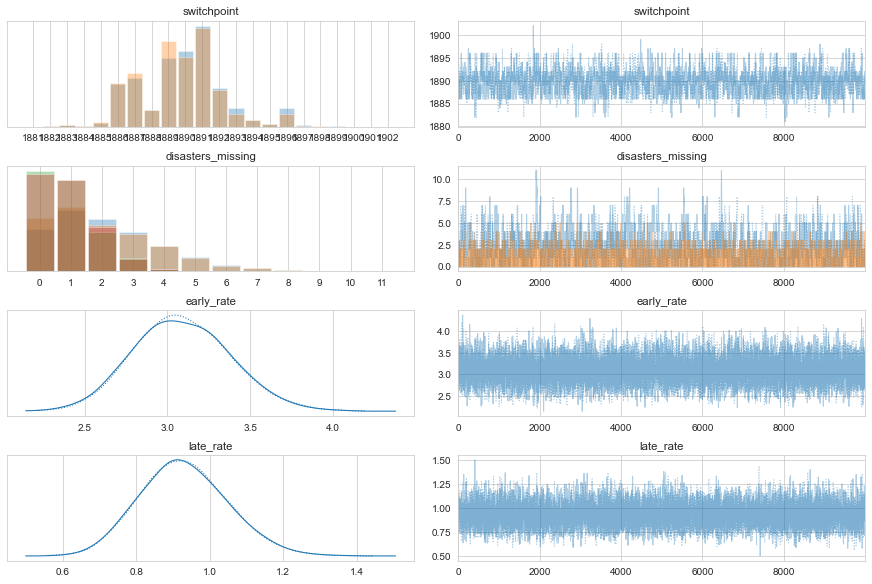

In [23]:
pm.traceplot(trace);

Text(0.5, 0, 'Year')

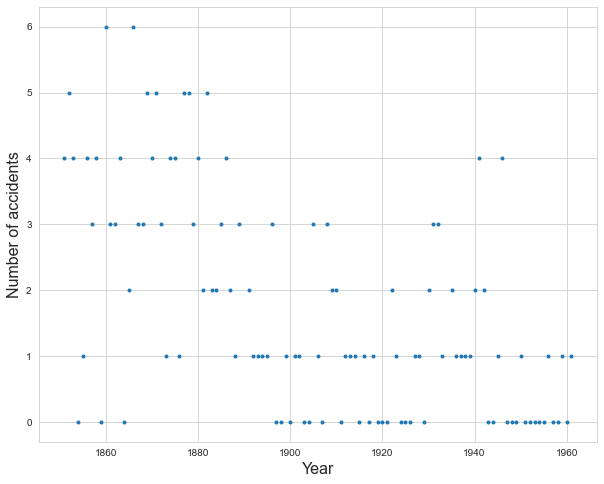

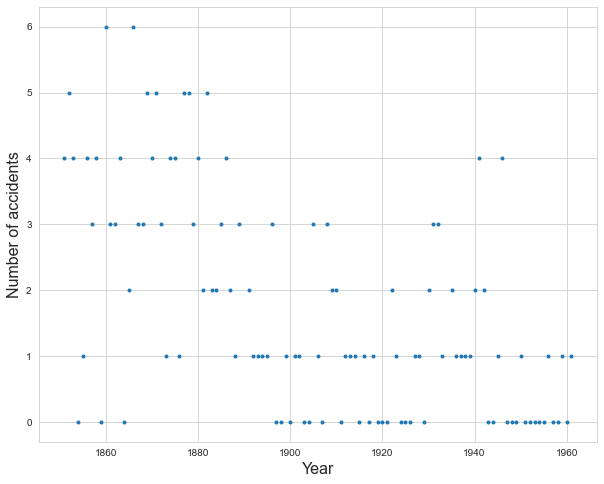

In [24]:
plt.figure(figsize=(10, 8))
plt.plot(years, disaster_data, '.')
plt.ylabel("Number of accidents", fontsize=16)
plt.xlabel("Year", fontsize=16)
plt.figure(figsize=(10, 8))
plt.plot(years, disaster_data, '.')
plt.ylabel("Number of accidents", fontsize=16)
plt.xlabel("Year", fontsize=16)

In [ ]:
Getting started with PyMC3¶
Authors: John Salvatier, Thomas V. Wiecki, Christopher Fonnesbeck

Note: This text is based on the PeerJ CS publication on PyMC3.

Abstract¶
Probabilistic Programming allows for automatic Bayesian inference on user-defined probabilistic models. Recent advances in Markov chain Monte Carlo (MCMC) sampling allow inference on increasingly complex models. This class of MCMC, known as Hamiltonian Monte Carlo, requires gradient information which is often not readily available. PyMC3 is a new open source Probabilistic Programming framework written in Python that uses Theano to compute gradients via automatic differentiation as well as compile probabilistic programs on-the-fly to C for increased speed. Contrary to other Probabilistic Programming languages, PyMC3 allows model specification directly in Python code. The lack of a domain specific language allows for great flexibility and direct interaction with the model. This paper is a tutorial-style introduction to this software package.

Introduction¶
Probabilistic programming (PP) allows flexible specification of Bayesian statistical models in code. PyMC3 is a new, open-source PP framework with an intuitive and readable, yet powerful, syntax that is close to the natural syntax statisticians use to describe models. It features next-generation Markov chain Monte Carlo (MCMC) sampling algorithms such as the No-U-Turn Sampler (NUTS; Hoffman, 2014), a self-tuning variant of Hamiltonian Monte Carlo (HMC; Duane, 1987). This class of samplers works well on high dimensional and complex posterior distributions and allows many complex models to be fit without specialized knowledge about fitting algorithms. HMC and NUTS take advantage of gradient information from the likelihood to achieve much faster convergence than traditional sampling methods, especially for larger models. NUTS also has several self-tuning strategies for adaptively setting the tunable parameters of Hamiltonian Monte Carlo, which means you usually don’t need to have specialized knowledge about how the algorithms work. PyMC3, Stan (Stan Development Team, 2014), and the LaplacesDemon package for R are currently the only PP packages to offer HMC.

Probabilistic programming in Python confers a number of advantages including multi-platform compatibility, an expressive yet clean and readable syntax, easy integration with other scientific libraries, and extensibility via C, C++, Fortran or Cython. These features make it relatively straightforward to write and use custom statistical distributions, samplers and transformation functions, as required by Bayesian analysis.

While most of PyMC3’s user-facing features are written in pure Python, it leverages Theano (Bergstra et al., 2010) to transparently transcode models to C and compile them to machine code, thereby boosting performance. Theano is a library that allows expressions to be defined using generalized vector data structures called tensors, which are tightly integrated with the popular NumPy ndarray data structure, and similarly allow for broadcasting and advanced indexing, just as NumPy arrays do. Theano also automatically optimizes the likelihood’s computational graph for speed and provides simple GPU integration.

Here, we present a primer on the use of PyMC3 for solving general Bayesian statistical inference and prediction problems. We will first see the basics of how to use PyMC3, motivated by a simple example: installation, data creation, model definition, model fitting and posterior analysis. Then we will cover two case studies and use them to show how to define and fit more sophisticated models. Finally we will show how to extend PyMC3 and discuss other useful features: the Generalized Linear Models subpackage, custom distributions, custom transformations and alternative storage backends.

Installation¶
Running PyMC3 requires a working Python interpreter, either version 2.7 (or more recent) or 3.5 (or more recent); we recommend that new users install version 3.5. A complete Python installation for Mac OSX, Linux and Windows can most easily be obtained by downloading and installing the free `Anaconda Python Distribution <https://store.continuum.io/cshop/anaconda/>`__ by ContinuumIO.

PyMC3 can be installed using pip (https://pip.pypa.io/en/latest/installing.html):

pip install pymc3
Or via conda:

conda install pymc3
The current development branch of PyMC3 can be installed from GitHub, also using pip:

pip install git+https://github.com/pymc-devs/pymc3
The source code for PyMC3 is hosted on GitHub at https://github.com/pymc-devs/pymc3 and is distributed under the liberal Apache License 2.0. On the GitHub site, users may also report bugs and other issues, as well as contribute documentation or code to the project, which we actively encourage.

A Motivating Example: Linear Regression¶
To introduce model definition, fitting and posterior analysis, we first consider a simple Bayesian linear regression model with normal priors for the parameters. We are interested in predicting outcomes Y as normally-distributed observations with an expected value μ that is a linear function of two predictor variables, X1 and X2.

Yμ∼N(μ,σ2)=α+β1X1+β2X2
where α is the intercept, and βi is the coefficient for covariate Xi, while σ represents the observation error. Since we are constructing a Bayesian model, we must assign a prior distribution to the unknown variables in the model. We choose zero-mean normal priors with variance of 100 for both regression coefficients, which corresponds to weak information regarding the true parameter values. We choose a half-normal distribution (normal distribution bounded at zero) as the prior for σ.

αβiσ∼N(0,100)∼N(0,100)∼|N(0,1)|
Generating data¶
We can simulate some artificial data from this model using only NumPy’s random module, and then use PyMC3 to try to recover the corresponding parameters. We are intentionally generating the data to closely correspond the PyMC3 model structure.

[1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# Initialize random number generator
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma
Here is what the simulated data look like. We use the pylab module from the plotting library matplotlib.

[2]:
%matplotlib inline

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)
axes[0].set_ylabel('Y'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2');
../_images/notebooks_getting_started_5_0.png
Model Specification¶
Specifying this model in PyMC3 is straightforward because the syntax is as close to the statistical notation. For the most part, each line of Python code corresponds to a line in the model notation above.

First, we import PyMC. We use the convention of importing it as pm.

[3]:
import pymc3 as pm
print('Running on PyMC3 v{}'.format(pm.__version__))
Running on PyMC3 v3.6
Now we build our model, which we will present in full first, then explain each part line-by-line.

[4]:
basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal('sigma', sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=Y)
The first line,

basic_model = Model()
creates a new Model object which is a container for the model random variables.

Following instantiation of the model, the subsequent specification of the model components is performed inside a with statement:

with basic_model:
This creates a context manager, with our basic_model as the context, that includes all statements until the indented block ends. This means all PyMC3 objects introduced in the indented code block below the with statement are added to the model behind the scenes. Absent this context manager idiom, we would be forced to manually associate each of the variables with basic_model right after we create them. If you try to create a new random variable without a with model: statement, it will raise an error since there is no obvious model for the variable to be added to.

The first three statements in the context manager:

alpha = Normal('alpha', mu=0, sigma=10)
beta = Normal('beta', mu=0, sigma=10, shape=2)
sigma = HalfNormal('sigma', sigma=1)
create stochastic random variables with Normal prior distributions for the regression coefficients with a mean of 0 and standard deviation of 10, and a half-normal distribution for the standard deviation of the observations, σ. These are stochastic because their values are partly determined by its parents in the dependency graph of random variables, which for priors are simple constants, and partly random (or stochastic).

We call the Normal constructor to create a random variable to use as a normal prior. The first argument is always the name of the random variable, which should almost always match the name of the Python variable being assigned to, since it is sometimes used to retrieve the variable from the model for summarizing output. The remaining required arguments for a stochastic object are the parameters, in this case mu, the mean, and sd, the standard deviation, which we assign hyperparameter values for the model. In general, a distribution’s parameters are values that determine the location, shape or scale of the random variable, depending on the parameterization of the distribution. Most commonly used distributions, such as Beta, Exponential, Categorical, Gamma, Binomial and many others, are available in PyMC3.

The beta variable has an additional shape argument to denote it as a vector-valued parameter of size 2. The shape argument is available for all distributions and specifies the length or shape of the random variable, but is optional for scalar variables, since it defaults to a value of one. It can be an integer, to specify an array, or a tuple, to specify a multidimensional array (e.g. shape=(5,7) makes random variable that takes on 5 by 7 matrix values).

Detailed notes about distributions, sampling methods and other PyMC3 functions are available in the API documentation.

Having defined the priors, the next statement creates the expected value mu of the outcomes, specifying the linear relationship:

mu = alpha + beta[0]*X1 + beta[1]*X2
This creates a deterministic random variable, which implies that its value is completely determined by its parents’ values. That is, there is no uncertainty beyond that which is inherent in the parents’ values. Here, mu is just the sum of the intercept alpha and the two products of the coefficients in beta and the predictor variables, whatever their values may be.

PyMC3 random variables and data can be arbitrarily added, subtracted, divided, multiplied together and indexed-into to create new random variables. This allows for great model expressivity. Many common mathematical functions like sum, sin, exp and linear algebra functions like dot (for inner product) and inv (for inverse) are also provided.

The final line of the model, defines Y_obs, the sampling distribution of the outcomes in the dataset.

Y_obs = Normal('Y_obs', mu=mu, sigma=sigma, observed=Y)
This is a special case of a stochastic variable that we call an observed stochastic, and represents the data likelihood of the model. It is identical to a standard stochastic, except that its observed argument, which passes the data to the variable, indicates that the values for this variable were observed, and should not be changed by any fitting algorithm applied to the model. The data can be passed in the form of either a numpy.ndarray or pandas.DataFrame object.

Notice that, unlike for the priors of the model, the parameters for the normal distribution of Y_obs are not fixed values, but rather are the deterministic object mu and the stochastic sigma. This creates parent-child relationships between the likelihood and these two variables.

Model fitting¶
Having completely specified our model, the next step is to obtain posterior estimates for the unknown variables in the model. Ideally, we could calculate the posterior estimates analytically, but for most non-trivial models, this is not feasible. We will consider two approaches, whose appropriateness depends on the structure of the model and the goals of the analysis: finding the maximum a posteriori (MAP) point using optimization methods, and computing summaries based on samples drawn from the posterior distribution using Markov Chain Monte Carlo (MCMC) sampling methods.

Maximum a posteriori methods¶
The maximum a posteriori (MAP) estimate for a model, is the mode of the posterior distribution and is generally found using numerical optimization methods. This is often fast and easy to do, but only gives a point estimate for the parameters and can be biased if the mode isn’t representative of the distribution. PyMC3 provides this functionality with the find_MAP function.

Below we find the MAP for our original model. The MAP is returned as a parameter point, which is always represented by a Python dictionary of variable names to NumPy arrays of parameter values.

[5]:
map_estimate = pm.find_MAP(model=basic_model)

map_estimate
/Users/twiecki/working/projects/pymc/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -149.58, ||grad|| = 12.242: 100%|██████████| 19/19 [00:00<00:00, 1478.46it/s]
[5]:
{'alpha': array(0.90660093),
 'beta': array([0.94848596, 2.60711845]),
 'sigma_log__': array(-0.03771373),
 'sigma': array(0.96298858)}
By default, find_MAP uses the Broyden–Fletcher–Goldfarb–Shanno (BFGS) optimization algorithm to find the maximum of the log-posterior but also allows selection of other optimization algorithms from the scipy.optimize module. For example, below we use Powell’s method to find the MAP.

[6]:
map_estimate = pm.find_MAP(model=basic_model, method='powell')

map_estimate
/Users/twiecki/working/projects/pymc/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
  0%|          | 0/5000 [00:00<?, ?it/s]/Users/twiecki/anaconda3/lib/python3.6/site-packages/scipy/optimize/_minimize.py:502: RuntimeWarning: Method powell does not use gradient information (jac).
  RuntimeWarning)
logp = -149.47, ||grad|| = 13.248: 100%|██████████| 177/177 [00:00<00:00, 1276.05it/s]
[6]:
{'alpha': array(0.90907964),
 'beta': array([0.9514399 , 2.61452795]),
 'sigma_log__': array(-0.03492212),
 'sigma': array(0.96568062)}
It is important to note that the MAP estimate is not always reasonable, especially if the mode is at an extreme. This can be a subtle issue; with high dimensional posteriors, one can have areas of extremely high density but low total probability because the volume is very small. This will often occur in hierarchical models with the variance parameter for the random effect. If the individual group means are all the same, the posterior will have near infinite density if the scale parameter for the group means is almost zero, even though the probability of such a small scale parameter will be small since the group means must be extremely close together.

Most techniques for finding the MAP estimate also only find a local optimum (which is often good enough), but can fail badly for multimodal posteriors if the different modes are meaningfully different.

In summary, while PyMC3 provides the function find_MAP(), at this point mostly for historical reasons, this function is of little use in most scenarios. If you want a point estimate you should get it from the posterior. In the next section we will see how to get a posterior using sampling methods.

Sampling methods¶
Though finding the MAP is a fast and easy way of obtaining estimates of the unknown model parameters, it is limited because there is no associated estimate of uncertainty produced with the MAP estimates. Instead, a simulation-based approach such as Markov chain Monte Carlo (MCMC) can be used to obtain a Markov chain of values that, given the satisfaction of certain conditions, are indistinguishable from samples from the true posterior distribution.

To conduct MCMC sampling to generate posterior samples in PyMC3, we specify a step method object that corresponds to a particular MCMC algorithm, such as Metropolis, Slice sampling, or the No-U-Turn Sampler (NUTS). PyMC3’s step_methods submodule contains the following samplers: NUTS, Metropolis, Slice, HamiltonianMC, and BinaryMetropolis. These step methods can be assigned manually, or assigned automatically by PyMC3. Auto-assignment is based on the attributes of each variable in the model. In general:

Binary variables will be assigned to BinaryMetropolis

Discrete variables will be assigned to Metropolis

Continuous variables will be assigned to NUTS

Auto-assignment can be overriden for any subset of variables by specifying them manually prior to sampling.

Gradient-based sampling methods¶
PyMC3 has the standard sampling algorithms like adaptive Metropolis-Hastings and adaptive slice sampling, but PyMC3’s most capable step method is the No-U-Turn Sampler. NUTS is especially useful on models that have many continuous parameters, a situation where other MCMC algorithms work very slowly. It takes advantage of information about where regions of higher probability are, based on the gradient of the log posterior-density. This helps it achieve dramatically faster convergence on large problems than traditional sampling methods achieve. PyMC3 relies on Theano to analytically compute model gradients via automatic differentiation of the posterior density. NUTS also has several self-tuning strategies for adaptively setting the tunable parameters of Hamiltonian Monte Carlo. For random variables that are undifferentiable (namely, discrete variables) NUTS cannot be used, but it may still be used on the differentiable variables in a model that contains undifferentiable variables.

NUTS requires a scaling matrix parameter, which is analogous to the variance parameter for the jump proposal distribution in Metropolis-Hastings, although NUTS uses it somewhat differently. The matrix gives the rough shape of the distribution so that NUTS does not make jumps that are too large in some directions and too small in other directions. It is important to set this scaling parameter to a reasonable value to facilitate efficient sampling. This is especially true for models that have many unobserved stochastic random variables or models with highly non-normal posterior distributions. Poor scaling parameters will slow down NUTS significantly, sometimes almost stopping it completely. A reasonable starting point for sampling can also be important for efficient sampling, but not as often.

PyMC3 automatically initializes NUTS to reasonable values based on the variance of the samples obtained during a tuning phase. A little bit of noise is added to ensure different, parallel, chains start from different points. Also, PyMC3 will automatically assign an appropriate sampler if we don’t supply it via the step keyword argument (see below for an example of how to explicitly assign step methods).

[7]:
with basic_model:
    # draw 500 posterior samples
    trace = pm.sample(500)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]
Sampling 2 chains: 100%|██████████| 2000/2000 [00:01<00:00, 1479.97draws/s]
/Users/twiecki/anaconda3/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
The sample function runs the step method(s) assigned (or passed) to it for the given number of iterations and returns a Trace object containing the samples collected, in the order they were collected. The trace object can be queried in a similar way to a dict containing a map from variable names to numpy.arrays. The first dimension of the array is the sampling index and the later dimensions match the shape of the variable. We can see the last 5 values for the alpha variable as follows:

[8]:
trace['alpha'][-5:]
[8]:
array([0.86038143, 0.88875012, 0.91392392, 0.99143432, 0.86691189])
If we wanted to use the slice sampling algorithm to sigma instead of NUTS (which was assigned automatically), we could have specified this as the step argument for sample.

[9]:
with basic_model:

    # instantiate sampler
    step = pm.Slice()

    # draw 5000 posterior samples
    trace = pm.sample(5000, step=step)
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Slice: [sigma]
>Slice: [beta]
>Slice: [alpha]
Sampling 2 chains: 100%|██████████| 11000/11000 [00:09<00:00, 1156.62draws/s]
/Users/twiecki/anaconda3/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
Posterior analysis¶
PyMC3 provides plotting and summarization functions for inspecting the sampling output. A simple posterior plot can be created using traceplot.

[10]:
pm.traceplot(trace);
../_images/notebooks_getting_started_25_0.png
The left column consists of a smoothed histogram (using kernel density estimation) of the marginal posteriors of each stochastic random variable while the right column contains the samples of the Markov chain plotted in sequential order. The beta variable, being vector-valued, produces two histograms and two sample traces, corresponding to both predictor coefficients.

In addition, the summary function provides a text-based output of common posterior statistics:

[11]:
pm.summary(trace).round(2)
/Users/twiecki/anaconda3/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
[11]:
mean	sd	mc_error	hpd_2.5	hpd_97.5	n_eff	Rhat
alpha	0.91	0.10	0.00	0.72	1.11	9283.21	1.0
beta__0	0.95	0.09	0.00	0.77	1.12	10340.59	1.0
beta__1	2.64	0.51	0.01	1.67	3.71	7468.93	1.0
sigma	0.99	0.07	0.00	0.85	1.12	8343.05	1.0
Case study 1: Stochastic volatility¶
We present a case study of stochastic volatility, time varying stock market volatility, to illustrate PyMC3’s use in addressing a more realistic problem. The distribution of market returns is highly non-normal, which makes sampling the volatilities significantly more difficult. This example has 400+ parameters so using common sampling algorithms like Metropolis-Hastings would get bogged down, generating highly autocorrelated samples. Instead, we use NUTS, which is dramatically more efficient.

The Model¶
Asset prices have time-varying volatility (variance of day over day returns). In some periods, returns are highly variable, while in others they are very stable. Stochastic volatility models address this with a latent volatility variable, which changes over time. The following model is similar to the one described in the NUTS paper (Hoffman 2014, p. 21).

νσsilog(ri)∼exp(0.1)∼exp(50)∼N(si−1,σ2)∼t(ν,0,exp(−2si))
Here, r is the daily return series which is modeled with a Student-t distribution with an unknown degrees of freedom parameter, and a scale parameter determined by a latent process s. The individual si are the individual daily log volatilities in the latent log volatility process.

The Data¶
Our data consist of 401 daily returns of the S&P 500 stock market index during the 2008 financial crisis.

[12]:
import pandas as pd

returns = pd.read_csv(pm.get_data('SP500.csv'), parse_dates=True, index_col=0)

len(returns)
[12]:
401
[13]:
returns.plot(figsize=(10, 6))
plt.ylabel('daily returns in %');
../_images/notebooks_getting_started_31_0.png
Model Specification¶
As with the linear regression example, specifying the model in PyMC3 mirrors its statistical specification. This model employs several new distributions: the Exponential distribution for the ν and σ priors, the Student-T (StudentT) distribution for distribution of returns, and the GaussianRandomWalk for the prior for the latent volatilities.

In PyMC3, variables with purely positive priors like Exponential are transformed with a log transform. This makes sampling more robust. Behind the scenes, a variable in the unconstrained space (named “variableName_log”) is added to the model for sampling. In this model this happens behind the scenes for both the degrees of freedom, nu, and the scale parameter for the volatility process, sigma, since they both have exponential priors. Variables with priors that constrain them on two sides, like Beta or Uniform, are also transformed to be unconstrained but with a log odds transform.

Although, unlike model specification in PyMC2, we do not typically provide starting points for variables at the model specification stage, we can also provide an initial value for any distribution (called a “test value”) using the testval argument. This overrides the default test value for the distribution (usually the mean, median or mode of the distribution), and is most often useful if some values are illegal and we want to ensure we select a legal one. The test values for the distributions are also used as a starting point for sampling and optimization by default, though this is easily overriden.

The vector of latent volatilities s is given a prior distribution by GaussianRandomWalk. As its name suggests GaussianRandomWalk is a vector valued distribution where the values of the vector form a random normal walk of length n, as specified by the shape argument. The scale of the innovations of the random walk, sigma, is specified in terms of the standard deviation of the normally distributed innovations and can be a scalar or vector.

[14]:
with pm.Model() as sp500_model:
    nu = pm.Exponential('nu', 1/10., testval=5.)
    sigma = pm.Exponential('sigma', 1/0.02, testval=.1)

    s = pm.GaussianRandomWalk('s', sigma=sigma, shape=len(returns))
    volatility_process = pm.Deterministic('volatility_process', pm.math.exp(-2*s)**0.5)

    r = pm.StudentT('r', nu=nu, sigma=volatility_process, observed=returns['change'])
Notice that we transform the log volatility process s into the volatility process by exp(-2*s). Here, exp is a Theano function, rather than the corresponding function in NumPy; Theano provides a large subset of the mathematical functions that NumPy does.

Also note that we have declared the Model name sp500_model in the first occurrence of the context manager, rather than splitting it into two lines, as we did for the first example.

Fitting¶
[15]:
with sp500_model:
    trace = pm.sample(2000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [s, sigma, nu]
Sampling 2 chains: 100%|██████████| 5000/5000 [02:04<00:00, 40.14draws/s]
/Users/twiecki/anaconda3/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
The estimated number of effective samples is smaller than 200 for some parameters.
We can check our samples by looking at the traceplot for nu and sigma.

[16]:
pm.traceplot(trace, varnames=['nu', 'sigma']);
/Users/twiecki/working/projects/pymc/pymc3/plots/__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))
../_images/notebooks_getting_started_38_1.png
Finally we plot the distribution of volatility paths by plotting many of our sampled volatility paths on the same graph. Each is rendered partially transparent (via the alpha argument in Matplotlib’s plot function) so the regions where many paths overlap are shaded more darkly.

[17]:
fig, ax = plt.subplots(figsize=(15, 8))
returns.plot(ax=ax)
ax.plot(returns.index, 1/np.exp(trace['s',::5].T), 'C3', alpha=.03);
ax.set(title='volatility_process', xlabel='time', ylabel='volatility');
ax.legend(['S&P500', 'stochastic volatility process']);
../_images/notebooks_getting_started_40_0.png
As you can see, the model correctly infers the increase in volatility during the 2008 financial crash. Moreover, note that this model is quite complex because of its high dimensionality and dependency-structure in the random walk distribution. NUTS as implemented in PyMC3, however, correctly infers the posterior distribution with ease.

Case study 2: Coal mining disasters¶
Consider the following time series of recorded coal mining disasters in the UK from 1851 to 1962 (Jarrett, 1979). The number of disasters is thought to have been affected by changes in safety regulations during this period. Unfortunately, we also have pair of years with missing data, identified as missing by a nan in the pandas Series. These missing values will be automatically imputed by PyMC3.

Next we will build a model for this series and attempt to estimate when the change occurred. At the same time, we will see how to handle missing data, use multiple samplers and sample from discrete random variables.

[18]:
import pandas as pd
disaster_data = pd.Series([4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
                           3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
                           2, 2, 3, 4, 2, 1, 3, np.nan, 2, 1, 1, 1, 1, 3, 0, 0,
                           1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
                           0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
                           3, 3, 1, np.nan, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
                           0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])
years = np.arange(1851, 1962)

plt.plot(years, disaster_data, 'o', markersize=8);
plt.ylabel("Disaster count")
plt.xlabel("Year");
../_images/notebooks_getting_started_43_0.png
Occurrences of disasters in the time series is thought to follow a Poisson process with a large rate parameter in the early part of the time series, and from one with a smaller rate in the later part. We are interested in locating the change point in the series, which perhaps is related to changes in mining safety regulations.

In our model,

Dtsel∼Pois(rt),rt={e,l,if t≤sif t>s∼Unif(tl,th)∼exp(1)∼exp(1)
the parameters are defined as follows: * Dt: The number of disasters in year t * rt: The rate parameter of the Poisson distribution of disasters in year t. * s: The year in which the rate parameter changes (the switchpoint). * e: The rate parameter before the switchpoint s. * l: The rate parameter after the switchpoint s. * tl, th: The lower and upper boundaries of year t.

This model is built much like our previous models. The major differences are the introduction of discrete variables with the Poisson and discrete-uniform priors and the novel form of the deterministic random variable rate.

[19]:
with pm.Model() as disaster_model:

    switchpoint = pm.DiscreteUniform('switchpoint', lower=years.min(), upper=years.max(), testval=1900)

    # Priors for pre- and post-switch rates number of disasters
    early_rate = pm.Exponential('early_rate', 1)
    late_rate = pm.Exponential('late_rate', 1)

    # Allocate appropriate Poisson rates to years before and after current
    rate = pm.math.switch(switchpoint >= years, early_rate, late_rate)

    disasters = pm.Poisson('disasters', rate, observed=disaster_data)
/Users/twiecki/working/projects/pymc/pymc3/model.py:1277: UserWarning: Data in disasters contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, UserWarning)
The logic for the rate random variable,

rate = switch(switchpoint >= year, early_rate, late_rate)
is implemented using switch, a Theano function that works like an if statement. It uses the first argument to switch between the next two arguments.

Missing values are handled transparently by passing a MaskedArray or a pandas.DataFrame with NaN values to the observed argument when creating an observed stochastic random variable. Behind the scenes, another random variable, disasters.missing_values is created to model the missing values.

Unfortunately because they are discrete variables and thus have no meaningful gradient, we cannot use NUTS for sampling switchpoint or the missing disaster observations. Instead, we will sample using a Metroplis step method, which implements adaptive Metropolis-Hastings, because it is designed to handle discrete values. PyMC3 automatically assigns the correct sampling algorithms.

[20]:
with disaster_model:
    trace = pm.sample(10000)
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>CompoundStep
>>Metropolis: [disasters_missing]
>>Metropolis: [switchpoint]
>NUTS: [late_rate, early_rate]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:14<00:00, 1400.63draws/s]
/Users/twiecki/anaconda3/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
The number of effective samples is smaller than 10% for some parameters.
In the trace plot below we can see that there’s about a 10 year span that’s plausible for a significant change in safety, but a 5 year span that contains most of the probability mass. The distribution is jagged because of the jumpy relationship between the year switchpoint and the likelihood and not due to sampling error.

[21]:
pm.traceplot(trace);
../_images/notebooks_getting_started_50_0.png
The following plot shows the switch point as an orange vertical line, together with its HPD as a semitransparent band. The dashed black line shows the accident rate.

[22]:
plt.figure(figsize=(10, 8))
plt.plot(years, disaster_data, '.')
plt.ylabel("Number of accidents", fontsize=16)
plt.xlabel("Year", fontsize=16)

plt.vlines(trace['switchpoint'].mean(), disaster_data.min(), disaster_data.max(), color='C1')
average_disasters = np.zeros_like(disaster_data, dtype='float')
for i, year in enumerate(years):
    idx = year < trace['switchpoint']
    average_disasters[i] = (trace['early_rate'][idx].sum() + trace['late_rate'][~idx].sum()) / (len(trace) * trace.nchains)

sp_hpd = pm.hpd(trace['switchpoint'])
plt.fill_betweenx(y=[disaster_data.min(), disaster_data.max()],
                  x1=sp_hpd[0], x2=sp_hpd[1], alpha=0.5, color='C1');
plt.plot(years, average_disasters,  'k--', lw=2);
../_images/notebooks_getting_started_52_0.png
Arbitrary deterministics¶
Due to its reliance on Theano, PyMC3 provides many mathematical functions and operators for transforming random variables into new random variables. However, the library of functions in Theano is not exhaustive, therefore Theano and PyMC3 provide functionality for creating arbitrary Theano functions in pure Python, and including these functions in PyMC models. This is supported with the as_op function decorator.

Theano needs to know the types of the inputs and outputs of a function, which are specified for as_op by itypes for inputs and otypes for outputs. The Theano documentation includes an overview of the available types.

[23]:
import theano.tensor as tt
from theano.compile.ops import as_op

@as_op(itypes=[tt.lscalar], otypes=[tt.lscalar])
def crazy_modulo3(value):
    if value > 0:
        return value % 3
    else :
        return (-value + 1) % 3

with pm.Model() as model_deterministic:
    a = pm.Poisson('a', 1)
    b = crazy_modulo3(a)
An important drawback of this approach is that it is not possible for theano to inspect these functions in order to compute the gradient required for the Hamiltonian-based samplers. Therefore, it is not possible to use the HMC or NUTS samplers for a model that uses such an operator. However, it is possible to add a gradient if we inherit from theano.Op instead of using as_op. The PyMC example set includes a more elaborate example of the usage of as_op.

Arbitrary distributions¶
Similarly, the library of statistical distributions in PyMC3 is not exhaustive, but PyMC3 allows for the creation of user-defined functions for an arbitrary probability distribution. For simple statistical distributions, the DensityDist function takes as an argument any function that calculates a log-probability log(p(x)). This function may employ other random variables in its calculation. Here is an example inspired by a blog post by Jake Vanderplas on which priors to use for a linear regression (Vanderplas, 2014).

import theano.tensor as tt

with pm.Model() as model:
    alpha = pm.Uniform('intercept', -100, 100)

    # Create custom densities
    beta = pm.DensityDist('beta', lambda value: -1.5 * tt.log(1 + value**2), testval=0)
    eps = pm.DensityDist('eps', lambda value: -tt.log(tt.abs_(value)), testval=1)

    # Create likelihood
    like = pm.Normal('y_est', mu=alpha + beta * X, sigma=eps, observed=Y)
For more complex distributions, one can create a subclass of Continuous or Discrete and provide the custom logp function, as required. This is how the built-in distributions in PyMC are specified. As an example, fields like psychology and astrophysics have complex likelihood functions for a particular process that may require numerical approximation. In these cases, it is impossible to write the function in terms of predefined theano operators and we must use a custom theano operator using as_op or inheriting from theano.Op.

Implementing the beta variable above as a Continuous subclass is shown below, along with a sub-function.

[24]:
class Beta(pm.Continuous):
    def __init__(self, mu, *args, **kwargs):
        super(Beta, self).__init__(*args, **kwargs)
        self.mu = mu
        self.mode = mu

    def logp(self, value):
        mu = self.mu
        return beta_logp(value - mu)


def beta_logp(value):
    return -1.5 * np.log(1 + (value)**2)


with pm.Model() as model:
    beta = Beta('slope', mu=0, testval=0)
If your logp can not be expressed in Theano, you can decorate the function with as_op as follows: @as_op(itypes=[tt.dscalar], otypes=[tt.dscalar]). Note, that this will create a blackbox Python function that will be much slower and not provide the gradients necessary for e.g. NUTS.

Generalized Linear Models¶
Generalized Linear Models (GLMs) are a class of flexible models that are widely used to estimate regression relationships between a single outcome variable and one or multiple predictors. Because these models are so common, PyMC3 offers a glm submodule that allows flexible creation of various GLMs with an intuitive R-like syntax that is implemented via the patsy module.

The glm submodule requires data to be included as a pandas DataFrame. Hence, for our linear regression example:

[25]:
# Convert X and Y to a pandas DataFrame
df = pd.DataFrame({'x1': X1, 'x2': X2, 'y': Y})
The model can then be very concisely specified in one line of code.

[26]:
from pymc3.glm import GLM

with pm.Model() as model_glm:
    GLM.from_formula('y ~ x1 + x2', df)
    trace = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, x2, x1, Intercept]
Sampling 2 chains: 100%|██████████| 2000/2000 [00:01<00:00, 1402.82draws/s]
/Users/twiecki/anaconda3/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
The error distribution, if not specified via the family argument, is assumed to be normal. In the case of logistic regression, this can be modified by passing in a Binomial family object.

[27]:
from pymc3.glm.families import Binomial

df_logistic = pd.DataFrame({'x1': X1, 'y': Y > np.median(Y)})

with pm.Model() as model_glm_logistic:
    GLM.from_formula('y ~ x1', df_logistic, family=Binomial())
For a more complete and flexible formula interface, including hierarchical GLMs, see Bambi.

Discussion¶
Probabilistic programming is an emerging paradigm in statistical learning, of which Bayesian modeling is an important sub-discipline. The signature characteristics of probabilistic programming–specifying variables as probability distributions and conditioning variables on other variables and on observations–makes it a powerful tool for building models in a variety of settings, and over a range of model complexity. Accompanying the rise of probabilistic programming has been a burst of innovation in fitting methods for Bayesian models that represent notable improvement over existing MCMC methods. Yet, despite this expansion, there are few software packages available that have kept pace with the methodological innovation, and still fewer that allow non-expert users to implement models.

PyMC3 provides a probabilistic programming platform for quantitative researchers to implement statistical models flexibly and succinctly. A large library of statistical distributions and several pre-defined fitting algorithms allows users to focus on the scientific problem at hand, rather than the implementation details of Bayesian modeling. The choice of Python as a development language, rather than a domain-specific language, means that PyMC3 users are able to work interactively to build models, introspect model objects, and debug or profile their work, using a dynamic, high-level programming language that is easy to learn. The modular, object-oriented design of PyMC3 means that adding new fitting algorithms or other features is straightforward. In addition, PyMC3 comes with several features not found in most other packages, most notably Hamiltonian-based samplers as well as automatical transforms of constrained random variables which is only offered by STAN. Unlike STAN, however, PyMC3 supports discrete variables as well as non-gradient based sampling algorithms like Metropolis-Hastings and Slice sampling.

Development of PyMC3 is an ongoing effort and several features are planned for future versions. Most notably, variational inference techniques are often more efficient than MCMC sampling, at the cost of generalizability. More recently, however, black-box variational inference algorithms have been developed, such as automatic differentiation variational inference (ADVI; Kucukelbir et al., 2017). This algorithm is slated for addition to PyMC3. As an open-source scientific computing toolkit, we encourage researchers developing new fitting algorithms for Bayesian models to provide reference implementations in PyMC3. Since samplers can be written in pure Python code, they can be implemented generally to make them work on arbitrary PyMC3 models, giving authors a larger audience to put their methods into use.

References¶
Patil, A., D. Huard and C.J. Fonnesbeck. (2010) PyMC: Bayesian Stochastic Modelling in Python. Journal of Statistical Software, 35(4), pp. 1-81

Bastien, F., Lamblin, P., Pascanu, R., Bergstra, J., Goodfellow, I., Bergeron, A., Bouchard, N., Warde-Farley, D., and Bengio, Y. (2012) “Theano: new features and speed improvements”. NIPS 2012 deep learning workshop.

Bergstra, J., Breuleux, O., Bastien, F., Lamblin, P., Pascanu, R., Desjardins, G., Turian, J., Warde-Farley, D., and Bengio, Y. (2010) “Theano: A CPU and GPU Math Expression Compiler”. Proceedings of the Python for Scientific Computing Conference (SciPy) 2010. June 30 - July 3, Austin, TX

Lunn, D.J., Thomas, A., Best, N., and Spiegelhalter, D. (2000) WinBUGS – a Bayesian modelling framework: concepts, structure, and extensibility. Statistics and Computing, 10:325–337.

Neal, R.M. Slice sampling. Annals of Statistics. (2003). doi:10.2307/3448413.

van Rossum, G. The Python Library Reference Release 2.6.5., (2010). URL http://docs.python.org/library/.

Duane, S., Kennedy, A. D., Pendleton, B. J., and Roweth, D. (1987) “Hybrid Monte Carlo”, Physics Letters, vol. 195, pp. 216-222.

Stan Development Team. (2014). Stan: A C++ Library for Probability and Sampling, Version 2.5.0. http://mc-stan.org.

Gamerman, D. Markov Chain Monte Carlo: statistical simulation for Bayesian inference. Chapman and Hall, 1997.

Hoffman, M. D., & Gelman, A. (2014). The No-U-Turn Sampler: Adaptively Setting Path Lengths in Hamiltonian Monte Carlo. The Journal of Machine Learning Research, 30.

Kucukelbir A, Dustin Tran, Ranganath R, Gelman A, and Blei DM. Automatic differentiation variational inference http://arxiv.org/abs/1506.03431, The Journal of Machine Learning Research. 18 , pp. 430-474 .

Vanderplas, Jake. “Frequentism and Bayesianism IV: How to be a Bayesian in Python.” Pythonic Perambulations. N.p., 14 Jun 2014. Web. 27 May. 2015. https://jakevdp.github.io/blog/2014/06/14/frequentism-and-bayesianism-4-bayesian-in-python/.

R.G. Jarrett. A note on the intervals between coal mining disasters. Biometrika, 66:191–193, 1979.

  
© Copyright 2018, The PyMC Development Team.

Created using Sphinx 2.2.1.